In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [251]:
import numpy as np
from webcolors import hex_to_rgb
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)  

In [272]:
df_pubmed = pd.read_excel("data/Scoping_review_text-analysis_extraction_20231115.xlsx", sheet_name="Harmonized Information Extracti")
df_pubmed['publication_type'] = "biomedical_journal"

In [273]:
df_acl = pd.read_excel("data/Scoping_review_text-analysis_extraction_20231115.xlsx", sheet_name="ACLEMNLP Google Scholar")
df_acl['publication_type'] = "nlp_venue"

In [274]:
df_included = df_pubmed[df_pubmed['Included'] == 1.0]
df_acl_included = df_acl[df_acl['Included'] == 1.0]

In [275]:
#df = df.iloc[1:]

In [276]:
df_pubmed.shape, df_included.shape, df_acl.shape, df_acl_included.shape

((504, 71), (89, 71), (491, 68), (52, 68))

In [277]:
df = pd.concat([df_included, df_acl_included], ignore_index=True)
df['year'] = df['year'].astype(int)

df.head()

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,Domain of automated approach,Target database,Data type,Data filter applied,Hosted Application for End-users,Alternative Approach,LLM Model,Models/Resources used with LLM,System Architecture/ Flow,Programming language,Library/Framework,Library/Framework Harmonized,Reported performance metrics,Reported performance metrics Harmonized,Source code availability,Source code link,Data used availability,Preprocessing applied,Pretraining corpus origin,Pretraining corpus size,Fine-tuning corpus data/task,New annotations,Annotations type,New dataset developed,Fine-tuning corpus size,Number of tasks/datasets for performance evaluation,Hardware used for training/validation/fine-tuning,Hardware type,Internal validity 1,Internal validity 2,External validity,External validity.1,Comment,Unnamed: 43,url,label,type,abstract,address,accession,Link,issue,keywords,language,issn,pages,volume,DA,DB,DP,ID,j2,m3,n1,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40
0,"Abdelkader, W. and Navarro, T. and Parrish, R....",10.2196/29398,https://doi.org/10.2196/29398,A Deep Learning Approach to Refine the Identif...,JMIR Research Protocols,2021,BVI,1.0,NaN,Text Classification,Literature Screening: improve the precision of...,PubMed,Abstracts,NaN,no,NaN,"BERT, BioBERT, BlueBERT, PubMedBERT",NaN,BERT architecture,Python,HuggingFace,HuggingFace,"F1, recall, specificity, accuracy, precision, ...","F1-Score, Recall, Specificity, Accuracy, Preci...",no,NaN,on request,NaN,depends on BERT model,depends on BERT model,Custom-annotated PubMed data,"Article type: original study, systematic revie...",NaN,yes,"Total 2012–2020, N=160 712 (positive 29810 and...",1.0,"8 Intel Silver 4216 Cascade Lake CPU cores, an...","GPU, CPU",Yes,No,No,NaN,Protocol!,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Abdelkader_2021_JMIRReseProt,JOUR,BACKGROUND: A barrier to practicing evidence-b...,"Abdelkader, Wael. Health Information Research ...",34847061.0,NaN,11.0,NaN,English,1929-0748,e29398,10.0,2023-11-29 00:00:00,MEDLINE,Ovid Technologies,15.0,JMIR Res Protoc,NaN,"Abdelkader, Wael Navarro, Tamara Parrish, Rick...",A Deep Learning Approach to Refine the Identif...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN
1,"Alachram, H. and Chereda, H. and Beisbarth, T....",10.1371/journal.pone.0258623,https://doi.org/10.1371/journal.pone.0258623,Text mining-based word representations for bio...,PLoS ONE [Electronic Resource],2021,BVI,1.0,NaN,Information Extraction,General biomedical text mining/ Genomics: Extr...,"PubMed, Gene Expression Omnibus repository","Abstracts, Functional Genomics",NaN,yes: https://ebiomecon.genexplain.com/,NaN,BioBERT,Graph-CNN based on Human Protein Reference Dat...,BERT architecture,Python,PyTorch,PyTorch,"AUC, Accuracy, F1, similarity threshold","AUC, Accuracy, F1-Score, Similarity Threshold",no,NaN,NaN,for word2vec training: The first phase applied...,for word2vec PubMed FTP repository,"16,558,093 article abstracts",HPRD PPI; Custom-annotated from GEO series,genomic predictors of response and survival in...,NaN,yes,10 microarray datasets measured on Affymetrix ...,"4 (lung cancer, liver cancer, prostate cancer,...",NaN,NaN,Yes,No,yes,word2vec,NaN,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Alachram_2021_PLoONE.ElRes,JOUR,Biomedical and life science literature is an e...,"Alachram, Halima. Department of Medical Bioinf...",34653224.0,NaN,10.0,Algorithms and *Breast Neoplasms/ge [Genetics]...,English,1932-6203,e0258623,16.0,NaN,MEDLINE,Ovid Technologies,101.0,PLoS ONE,"Research Support, Non-U.S. Gov't","Alachram, Halima Chereda, Hryhorii Beisbarth, ...",Text mining-based word representations for bio...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN
2,"Ambalavanan, A. K. and Devarakonda, M. V.",10.1016/j.jbi.2020.103578,https://doi.org/10.1016/j.jbi.2020.103578,Using the contextual language model BERT for m...,Journal of Biomedical Informatics,2020,BVI,1.0,NaN

In [278]:
df.shape

(141, 72)

### random sample for a pilot with student

In [53]:
# Sample 3 random rows from df_included
df_included_sampled = df_pubmed[df_pubmed['Included'] == 1.0].sample(n=3, random_state=42)

# Sample 2 random rows from df_acl_included
df_acl_included_sampled = df_acl[df_acl['Included'] == 1.0].sample(n=2, random_state=42)

# Combine the sampled DataFrames
combined_df = pd.concat([df_included_sampled, df_acl_included_sampled])
combined_df_first_cols = combined_df.iloc[:, :6]

# Display the combined DataFrame
combined_df.head()

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,Domain of automated approach,Target database,Data type,Data filter applied,Hosted Application for End-users,Alternative Approach,LLM Model,Models/Resources used with LLM,System Architecture/ Flow,Programming language,Library/Framework,Library/Framework Harmonized,Reported performance metrics,Reported performance metrics Harmonized,Source code availability,Source code link,Data used availability,Preprocessing applied,Pretraining corpus origin,Pretraining corpus size,Fine-tuning corpus data/task,New annotations,Annotations type,New dataset developed,Fine-tuning corpus size,Number of tasks/datasets for performance evaluation,Hardware used for training/validation/fine-tuning,Hardware type,Internal validity 1,Internal validity 2,External validity,External validity.1,Comment,Unnamed: 43,url,label,type,abstract,address,accession,Link,issue,keywords,language,issn,pages,volume,DA,DB,DP,ID,j2,m3,n1,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40
219,"Li, D. and Xiong, Y. and Hu, B. and Tang, B. a...",10.1186/s12911-021-01614-7,https://doi.org/10.1186/s12911-021-01614-7,Drug knowledge discovery via multi-task learni...,BMC Medical Informatics & Decision Making,2021.0,SDO,1.0,NaN,Information Extraction,Pharma/ Drug Repurposing: Collecting mutation-...,PubMed,Abstracts,NaN,no,NaN,"BERT, NCBI BERT, ClinicalBERT, BioBERT",NaN,We start by splitting the PubMed abstract into...,python,NaN,NaN,"Precision, Recall, F1-score","Precision, Recall, F1-Score",no,NaN,yes,WordPiece tokenization,depends on BERT model,depends on BERT model,BC5CDR-disease; NCBI-disease; BC2GM; 2010 i2b2...,NaN,NaN,no,"# Train 4559; 5423; 12,573; 16,315 # Dev 4580;...",4.0,NaN,NaN,yes,NaN,yes,BiLSTM + CRF,NaN,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Li_2021_BMI.DM,JOUR,BACKGROUND: Drug repurposing is to find new in...,"Li, Dongfang. Harbin Institute of Technology (...",34789238.0,NaN,Suppl 9,Algorithms and Humans and Information Storage ...,English,1472-6947,251.0,21.0,11 16,MEDLINE,Ovid Technologies,2897.0,BMC Med Inf Decis Mak,"Research Support, Non-U.S. Gov't","Li, Dongfang Xiong, Ying Hu, Baotian Tang, Buz...",Drug knowledge discovery via multi-task learni...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN
265,"Martenot, V. and Masdeu, V. and Cupe, J. and G...",10.1186/s12911-022-02085-0,https://doi.org/10.1186/s12911-022-02085-0,LiSA: an assisted literature search pipeline f...,BMC Medical Informatics & Decision Making,2022.0,SDO,1.0,NaN,Information Retrieval,Literature-Based Discovery/ Pharma/ Adverse-Dr...,PubMed,"Abstracts, Full-text, Sentences",NaN,"yes, but not public",NaN,"BioBERT, BlueBERT, SciBERT, Bio+ClinicalBERT, ...","regex-search, keyword search algorithm, rule-b...",documents -> format into 3 tables: documents (...,python,"HuggingFace, PowerBI for visualization","HuggingFace, PowerBI for visualization","precision, recall, F1-score; comparison to key...","Precision, Recall, F1-Score, Comparison to Key...",no,NaN,partially (custom dataset not open),sentence tokenization,depends on BERT,depends on BERT,ADE-Corpus-V2 dataset; Custom-annotated PubMed...,sentences labeled for three categories based o...,NaN,yes,20k sentences ; 7776 sentences,3.0,NaN,NaN,yes,NaN,partially,only LLM models compared,they use PowerBI for visualisation!,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Martenot_2022_BMI.DM,JOUR,INTRODUCTION: Detecting safety signals attribu...,"Martenot, Vincent. Quinten, 8 rue Vernier, 750...",36550485.0,NaN,1.0,Humans and *Deep Learning and Reproducibility ...,English,1472-6947,338.0,22.0,12 22,MEDLINE,Ovid Technologies,3308.0,BMC Med Inf Decis Mak,"Research Support, Non-U.S. Gov't","Martenot, Vincent Masdeu, Valentin Cupe, Jean ...",LiSA: an assisted literature search pipeline f...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN
166,"Ji, Z. and Wei, Q. and Xu, H.",NaN,https://doi.org/,BERT-based Ranking for Biomedical Entity Norma...,AMI

In [54]:
combined_df_first_cols.to_csv("sample_to_test_new_extractor.csv")

In [55]:
combined_df.to_csv("full_sample_to_test_new_extractor.csv")

# SRs

In [56]:
filtered_df_sr = df[df['Domain of automated approach'].str.contains('Systematic', na=False)]
filtered_df_sr = filtered_df_sr[['Domain of automated approach', 'Target application']]
filtered_df_sr[['Approach Keywords', 'Application description']] = filtered_df_sr['Domain of automated approach'].str.split(':', 1, expand=True)
filtered_df_sr['Approach Keywords'] = filtered_df_sr['Approach Keywords'].str.replace('Systematic Reviews/', '')
filtered_df_sr['Approach Keywords'] = filtered_df_sr['Approach Keywords'].str.replace(' Systematic Reviews', '')
filtered_df_sr['Approach Keywords'] = filtered_df_sr['Approach Keywords'].str.replace('Systematic Reviews', '')

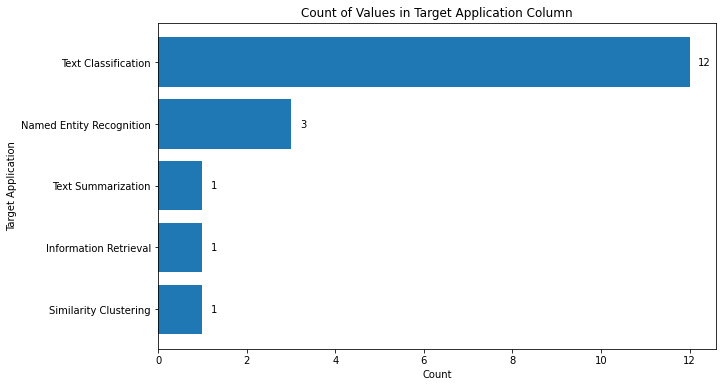

In [57]:
# Counting values in the 'Target application' column
value_counts = filtered_df_sr['Target application'].value_counts()

# Sorting by highest count
value_counts = value_counts.sort_values(ascending=True)

# Increasing image size
plt.figure(figsize=(10, 6))

# Creating a horizontal bar plot with sorted values
plt.barh(value_counts.index, value_counts.values)
plt.ylabel('Target Application')
plt.xlabel('Count')
plt.title('Count of Values in Target Application Column')

# Displaying count values next to each bar
for i, count in enumerate(value_counts.values):
    plt.text(count + 0.2, i, str(count), va='center')

plt.show()

In [58]:
filtered_df_sr.head()

,Domain of automated approach,Target application,Approach Keywords,Application description
2,Literature Screening/ Combination of Selection...,Text Classification,Literature Screening/ Combination of Selection...,Screening scientific articles for systematic ...
4,Literature Screening/ Systematic Reviews/ Moxi...,Text Classification,Literature Screening/ Moxibustion for improvi...,Screening scientific articles for systematic ...
7,Literature Screening/ PICO Recognition/ Biome...,Named Entity Recognition,Literature Screening/ PICO Recognition/ Biome...,PICO recognition (as NER) to improve referenc...
12,Literature Screening/ Systematic Reviews/ Neur...,Text Classification,Literature Screening/ Neurosurgery,Classification of Short Scientific Texts to i...
13,Literature-Based Discovery/ Thematically Coher...,Similarity Clustering,Literature-Based Discovery/ Thematically Coher...,Assist domain specialists in comprehending th...


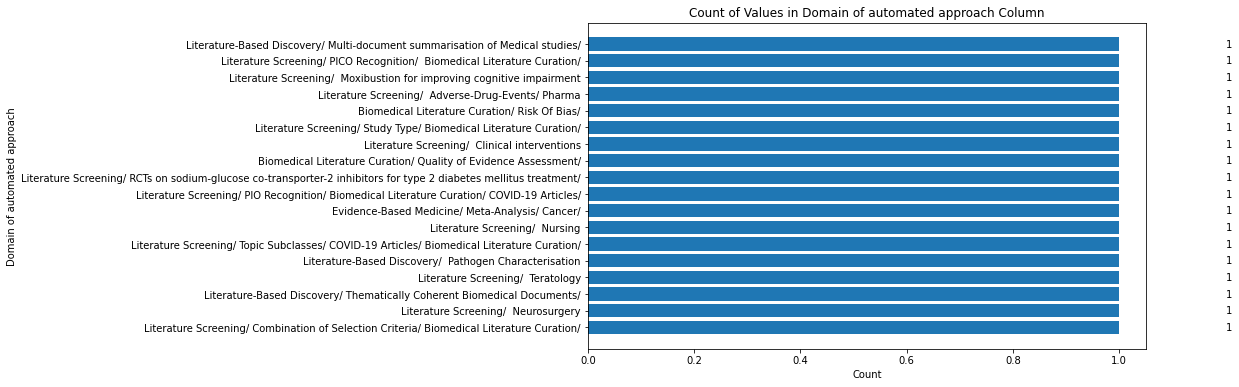

In [59]:
# Counting values in the 'Target application' column
value_counts = filtered_df_sr['Approach Keywords'].value_counts()

# Sorting by highest count
value_counts = value_counts.sort_values(ascending=True)

# Increasing image size
plt.figure(figsize=(10, 6))

# Creating a horizontal bar plot with sorted values
plt.barh(value_counts.index, value_counts.values)
plt.ylabel('Domain of automated approach')
plt.xlabel('Count')
plt.title('Count of Values in Domain of automated approach Column')

# Displaying count values next to each bar
for i, count in enumerate(value_counts.values):
    plt.text(count + 0.2, i, str(count), va='center')

plt.show()

In [60]:
df = filtered_df_sr[['Approach Keywords','Target application']]

In [61]:
# Splitting the column and unpacking into different columns
split_columns = df['Approach Keywords'].str.split('/', expand=True)

# Renaming the split columns
split_columns.columns = [f'Level_{i+1}' for i in range(split_columns.shape[1])]

# Combining the original DataFrame with the split columns
df = pd.concat([df, split_columns], axis=1)

# Dropping the original column
df.drop(columns=['Approach Keywords'], inplace=True)
df.drop(columns=['Level_5'], inplace=True)

df['Count'] = 1
df

,Target application,Level_1,Level_2,Level_3,Level_4,Count
2,Text Classification,Literature Screening,Combination of Selection Criteria,Biomedical Literature Curation,,1
4,Text Classification,Literature Screening,Moxibustion for improving cognitive impairment,None,None,1
7,Named Entity Recognition,Literature Screening,PICO Recognition,Biomedical Literature Curation,,1
12,Text Classification,Literature Screening,Neurosurgery,None,None,1
13,Similarity Clustering,Literature-Based Discovery,Thematically Coherent Biomedical Documents,,None,1
25,Text Classification,Literature Screening,Teratology,None,None,1
31,Text Classification,Literature-Based Discovery,Pathogen Characterisation,None,None,1
39,Text Classification,Literature Screening,Topic Subclasses,COVID-19 Articles,Biomedical Literature Curation,1
54,Text Classification,Literature Screening,Nursing,None,None,1
57,Named Entity Recognition,Evidence-Based Medicine,Meta-Analysis,Cancer,,1


In [62]:
l1 = df["Level_1"].to_list()
l2 = df["Level_2"].to_list()
connect_values = df["Count"].to_list()
levels_combined = list(set(l1+l2))
#levels_combined
node_dict = {y:x for x, y in enumerate(levels_combined)}
node_dict

source = l1 
target = l2  
values = connect_values 

source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]

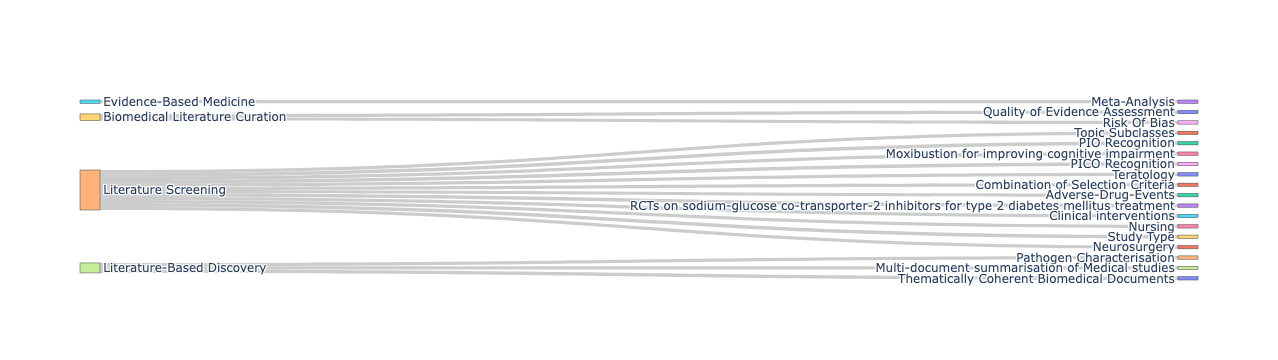

In [63]:
import plotly.graph_objects as go # Import the graphical object

fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            label = levels_combined
        ),
        # This part is for the link information
        link = dict(
            source = source_node,
            target = target_node,
            value = values
        ))])

# With this save the plots 
plot(fig,
     image_filename='sankey_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=600
)
# And shows the plot
fig.show()

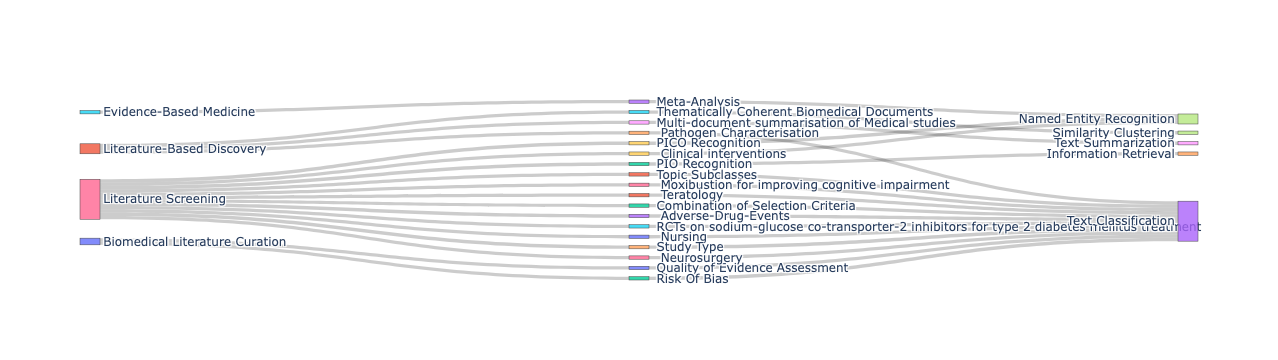

In [64]:
l1 = df["Level_1"].to_list()
l2 = df["Level_2"].to_list()
l3 = df["Target application"].to_list()
connect_values = df["Count"].to_list()

levels_combined = list(set(l1 + l2 + l3))
node_dict = {y: x for x, y in enumerate(levels_combined)}

source = l1 + l2
target = l2 + l3
values = connect_values * 2  # Duplicate for each level

source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]

values_combined = [f'Outgoing: {value}' for value in values]  # Include "Outgoing:"

fig = go.Figure(
    data=[go.Sankey(
        node=dict(
            label=levels_combined
        ),
        link=dict(
            source=source_node,
            target=target_node,
            value=values,
            label=values_combined  # Use the modified values_combined list
        ))])

# With this save the plots
plot(fig,
     image_filename='sankey_plot_1',
     image='png',
     image_width=1000,
     image_height=600)

# And show the plot
fig.show()


# Explorative

## Overview papers metadata

In [67]:
df = pd.concat([df_included, df_acl_included], ignore_index=True)
df['year'] = df['year'].astype(int)

df.head()

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,Domain of automated approach,Target database,Data type,Data filter applied,Hosted Application for End-users,Alternative Approach,LLM Model,Models/Resources used with LLM,System Architecture/ Flow,Programming language,Library/Framework,Library/Framework Harmonized,Reported performance metrics,Reported performance metrics Harmonized,Source code availability,Source code link,Data used availability,Preprocessing applied,Pretraining corpus origin,Pretraining corpus size,Fine-tuning corpus data/task,New annotations,Annotations type,New dataset developed,Fine-tuning corpus size,Number of tasks/datasets for performance evaluation,Hardware used for training/validation/fine-tuning,Hardware type,Internal validity 1,Internal validity 2,External validity,External validity.1,Comment,Unnamed: 43,url,label,type,abstract,address,accession,Link,issue,keywords,language,issn,pages,volume,DA,DB,DP,ID,j2,m3,n1,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40
0,"Abdelkader, W. and Navarro, T. and Parrish, R....",10.2196/29398,https://doi.org/10.2196/29398,A Deep Learning Approach to Refine the Identif...,JMIR Research Protocols,2021,BVI,1.0,NaN,Text Classification,Literature Screening: improve the precision of...,PubMed,Abstracts,NaN,no,NaN,"BERT, BioBERT, BlueBERT, PubMedBERT",NaN,BERT architecture,python,HuggingFace,HuggingFace,"F1, recall, specificity, accuracy, precision, ...","F1-Score, Recall, Specificity, Accuracy, Preci...",no,NaN,on request,Not reported,depends on BERT model,depends on BERT model,Custom-annotated PubMed data,"Article type: original study, systematic revie...",NaN,yes,"Total 2012–2020, N=160 712 (positive 29810 and...",1.0,"8 Intel Silver 4216 Cascade Lake CPU cores, an...","CPU, GPU",Yes,No,No,NaN,Protocol!,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Abdelkader_2021_JMIRReseProt,JOUR,BACKGROUND: A barrier to practicing evidence-b...,"Abdelkader, Wael. Health Information Research ...",34847061.0,NaN,11.0,NaN,English,1929-0748,e29398,10.0,2023-11-29 00:00:00,MEDLINE,Ovid Technologies,15.0,JMIR Res Protoc,NaN,"Abdelkader, Wael Navarro, Tamara Parrish, Rick...",A Deep Learning Approach to Refine the Identif...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN
1,"Alachram, H. and Chereda, H. and Beisbarth, T....",10.1371/journal.pone.0258623,https://doi.org/10.1371/journal.pone.0258623,Text mining-based word representations for bio...,PLoS ONE [Electronic Resource],2021,BVI,1.0,NaN,Information Extraction,General biomedical text mining/ Genomics: Extr...,"PubMed, Gene Expression Omnibus repository","Abstracts, Functional Genomics",NaN,yes: https://ebiomecon.genexplain.com/,NaN,BioBERT,Graph-CNN based on Human Protein Reference Dat...,BERT architecture,python,PyTorch,PyTorch,"AUC, Accuracy, F1, similarity threshold","AUC, Accuracy, F1-Score, Similarity Threshold",no,NaN,NaN,for word2vec training: The first phase applied...,for word2vec PubMed FTP repository,"16,558,093 article abstracts",HPRD PPI; Custom-annotated from GEO series,genomic predictors of response and survival in...,NaN,yes,10 microarray datasets measured on Affymetrix ...,"4 (lung cancer, liver cancer, prostate cancer,...",Not reported,NaN,Yes,No,yes,word2vec,NaN,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Alachram_2021_PLoONE.ElRes,JOUR,Biomedical and life science literature is an e...,"Alachram, Halima. Department of Medical Bioinf...",34653224.0,NaN,10.0,Algorithms and *Breast Neoplasms/ge [Genetics]...,English,1932-6203,e0258623,16.0,NaN,MEDLINE,Ovid Technologies,101.0,PLoS ONE,"Research Support, Non-U.S. Gov't","Alachram, Halima Chereda, Hryhorii Beisbarth, ...",Text mining-based word representations for bio...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN
2,"Ambalavanan, A. K. and Devarakonda, M. V.",10.1016/j.jbi.2020.103578,https://doi.org/10.1016/j.jbi.2020.103578,Using the contextual language model BERT for m...,Journal of Biomedical Informatic

<Figure size 720x576 with 0 Axes>

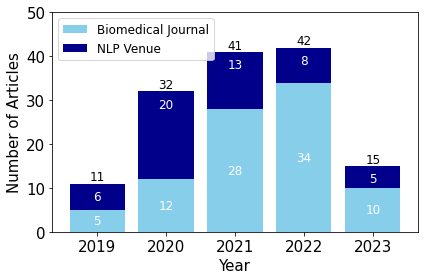

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(10, 8))

# Group by year and publication type, then count the occurrences
counts = df.groupby(['year', 'publication_type']).size().unstack(fill_value=0)

# Plot the stacked bar chart
bars = counts.plot(kind='bar', stacked=True, color=['skyblue', 'darkblue'], width=0.8)

# Add count values as annotations for each bar
for i, year in enumerate(counts.index):
    for pub_type, count in zip(counts.columns, counts.loc[year]):
        if pub_type == "biomedical_journal":
            plt.text(i, count/2 , str(count), color='white' if count < counts.sum(axis=1).max() else 'black', ha='center', va='center', fontsize=12)
        else:
            total_count = counts.sum(axis=1)[year]
            plt.text(i, total_count - 3, str(count), color='white' if count < counts.sum(axis=1).max() else 'black', ha='center', va='center', fontsize=12)

# Add total count values on top of each bar
for i, total_count in enumerate(counts.sum(axis=1)):
    plt.text(i, total_count, str(total_count), color='black', ha='center', va='bottom', fontsize=12)
    
# Set the y-axis limit to ensure it reaches up to 45
plt.ylim(0, 50)

# Customize the plot
plt.xticks(range(len(counts.index)), counts.index, rotation=360, fontsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Articles', fontsize=15)
#plt.title('Number Articles Over Publication Year', fontsize=16)
plt.legend(['Biomedical Journal', 'NLP Venue'], fontsize=12)

plt.tight_layout()
plt.savefig('viz/years_count_stacked_with_labels.png')
# Display the chart
plt.show()


In [69]:
counts

publication_type,biomedical_journal,nlp_venue
year,,
2019,5,6
2020,12,20
2021,28,13
2022,34,8
2023,10,5


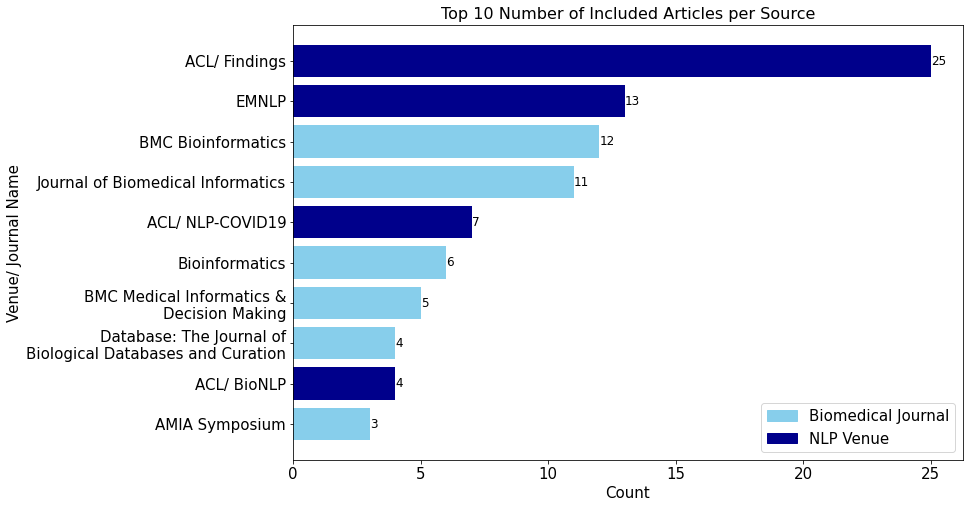

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Assuming df is your DataFrame

# Count the frequency of each category
category_counts = df.groupby(['journal', 'publication_type']).size()

# Modify the value with "\n" added
category_counts = category_counts.rename("count")
category_counts = category_counts.reset_index()
category_counts['journal'] = category_counts['journal'].replace({
    "Database: The Journal of Biological Databases and Curation": "Database: The Journal of\nBiological Databases and Curation",
    "BMC Medical Informatics & Decision Making": "BMC Medical Informatics &\nDecision Making",
    "Association for Computational Linguistics/ Findings": "ACL/ Findings",
    "Association for Computational Linguistics/ BioNLP": "ACL/ BioNLP",
    "Association for Computational Linguistics/ NLP-COVID19": "ACL/ NLP-COVID19",
    "AMIA Summits on Translational Science Proceedings": "AMIA Summits on Translational\nScience Proceedings",
    "AMIA ... Annual Symposium Proceedings/AMIA Symposium":"AMIA Symposium"
})

# Get the top 10 categories and sort in descending order
top_10_categories = category_counts.sort_values(by='count', ascending=False).head(10)

# Transpose the DataFrame
top_10_categories = pd.DataFrame(top_10_categories)

# Assign colors based on the publication type
colors = ['skyblue' if pub_type == 'biomedical_journal' else 'darkblue' for pub_type in top_10_categories['publication_type']]

# Reverse the order of colors to correspond with reversed bars
colors = colors[::-1]

# Create a larger figure
plt.figure(figsize=(12, 8))

# Create a horizontal bar chart with different colors for each publication type
bar_plot = plt.barh(top_10_categories['journal'][::-1], top_10_categories['count'][::-1], color=colors)

# Add labels and title
plt.xlabel('Count', fontsize=15)
plt.ylabel('Venue/ Journal Name', fontsize=15)
plt.title('Top 10 Number of Included Articles per Source', fontsize=16)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)

# Add count values as annotations
for bar, count in zip(bar_plot, top_10_categories['count'][::-1]):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, str(count), va='center', fontsize=12)

# Create legend handles for each category
legend_handles = [Patch(color='skyblue', label='Biomedical Journal'), Patch(color='darkblue', label='NLP Venue')]

# Add color legend
plt.legend(handles=legend_handles, fontsize=15)

# Save the plot to a local folder
plt.savefig('viz/top_10_journals_count.png', bbox_inches='tight')

# Display the chart
plt.show()


In [71]:
top_10_categories

,journal,publication_type,count
6,ACL/ Findings,nlp_venue,25
23,EMNLP,nlp_venue,13
9,BMC Bioinformatics,biomedical_journal,12
30,Journal of Biomedical Informatics,biomedical_journal,11
7,ACL/ NLP-COVID19,nlp_venue,7
14,Bioinformatics,biomedical_journal,6
10,BMC Medical Informatics &\nDecision Making,biomedical_journal,5
22,Database: The Journal of\nBiological Databases...,biomedical_journal,4
5,ACL/ BioNLP,nlp_venue,4
0,AMIA Symposium,biomedical_journal,3


## Target DB and Data Type

In [73]:
df.head(2)

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,Domain of automated approach,Target database,Data type,Data filter applied,Hosted Application for End-users,Alternative Approach,LLM Model,Models/Resources used with LLM,System Architecture/ Flow,Programming language,Library/Framework,Library/Framework Harmonized,Reported performance metrics,Reported performance metrics Harmonized,Source code availability,Source code link,Data used availability,Preprocessing applied,Pretraining corpus origin,Pretraining corpus size,Fine-tuning corpus data/task,New annotations,Annotations type,New dataset developed,Fine-tuning corpus size,Number of tasks/datasets for performance evaluation,Hardware used for training/validation/fine-tuning,Hardware type,Internal validity 1,Internal validity 2,External validity,External validity.1,Comment,Unnamed: 43,url,label,type,abstract,address,accession,Link,issue,keywords,language,issn,pages,volume,DA,DB,DP,ID,j2,m3,n1,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40
0,"Abdelkader, W. and Navarro, T. and Parrish, R....",10.2196/29398,https://doi.org/10.2196/29398,A Deep Learning Approach to Refine the Identif...,JMIR Research Protocols,2021,BVI,1.0,NaN,Text Classification,Literature Screening: improve the precision of...,PubMed,Abstracts,NaN,no,NaN,"BERT, BioBERT, BlueBERT, PubMedBERT",NaN,BERT architecture,python,HuggingFace,HuggingFace,"F1, recall, specificity, accuracy, precision, ...","F1-Score, Recall, Specificity, Accuracy, Preci...",no,NaN,on request,Not reported,depends on BERT model,depends on BERT model,Custom-annotated PubMed data,"Article type: original study, systematic revie...",NaN,yes,"Total 2012–2020, N=160 712 (positive 29810 and...",1.0,"8 Intel Silver 4216 Cascade Lake CPU cores, an...","CPU, GPU",Yes,No,No,NaN,Protocol!,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Abdelkader_2021_JMIRReseProt,JOUR,BACKGROUND: A barrier to practicing evidence-b...,"Abdelkader, Wael. Health Information Research ...",34847061.0,NaN,11.0,NaN,English,1929-0748,e29398,10.0,2023-11-29 00:00:00,MEDLINE,Ovid Technologies,15.0,JMIR Res Protoc,NaN,"Abdelkader, Wael Navarro, Tamara Parrish, Rick...",A Deep Learning Approach to Refine the Identif...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN
1,"Alachram, H. and Chereda, H. and Beisbarth, T....",10.1371/journal.pone.0258623,https://doi.org/10.1371/journal.pone.0258623,Text mining-based word representations for bio...,PLoS ONE [Electronic Resource],2021,BVI,1.0,NaN,Information Extraction,General biomedical text mining/ Genomics: Extr...,"PubMed, Gene Expression Omnibus repository","Abstracts, Functional Genomics",NaN,yes: https://ebiomecon.genexplain.com/,NaN,BioBERT,Graph-CNN based on Human Protein Reference Dat...,BERT architecture,python,PyTorch,PyTorch,"AUC, Accuracy, F1, similarity threshold","AUC, Accuracy, F1-Score, Similarity Threshold",no,NaN,NaN,for word2vec training: The first phase applied...,for word2vec PubMed FTP repository,"16,558,093 article abstracts",HPRD PPI; Custom-annotated from GEO series,genomic predictors of response and survival in...,NaN,yes,10 microarray datasets measured on Affymetrix ...,"4 (lung cancer, liver cancer, prostate cancer,...",Not reported,NaN,Yes,No,yes,word2vec,NaN,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Alachram_2021_PLoONE.ElRes,JOUR,Biomedical and life science literature is an e...,"Alachram, Halima. Department of Medical Bioinf...",34653224.0,NaN,10.0,Algorithms and *Breast Neoplasms/ge [Genetics]...,English,1932-6203,e0258623,16.0,NaN,MEDLINE,Ovid Technologies,101.0,PLoS ONE,"Research Support, Non-U.S. Gov't","Alachram, Halima Chereda, Hryhorii Beisbarth, ...",Text mining-based word representations for bio...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN


In [74]:
# Create a new column to store the flattened data types
df['Flattened_Data_Types'] = df['Target database'].str.split(', ')

# Explode the flattened data types into separate rows
df_exploded = df.explode('Flattened_Data_Types')

# Count the frequency of each data type
data_type_counts = df_exploded['Flattened_Data_Types'].value_counts()

# Print the frequency counts
# Adjust the maximum display options to show the full list
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the full list of data type counts
print(data_type_counts)

PubMed                                                          79
Clinical texts                                                  20
MEDLINE                                                         19
Social media                                                    12
CORD-19                                                         10
Wikipedia                                                        6
EMBASE                                                           6
DrugBank database                                                5
arXiv                                                            3
ClinicalTrials.gov                                               3
Cochrane                                                         3
Structured Product Labels (SPL)                                  2
Web of Science                                                   2
time-series                                                      2
NIH-FAQs                                                      

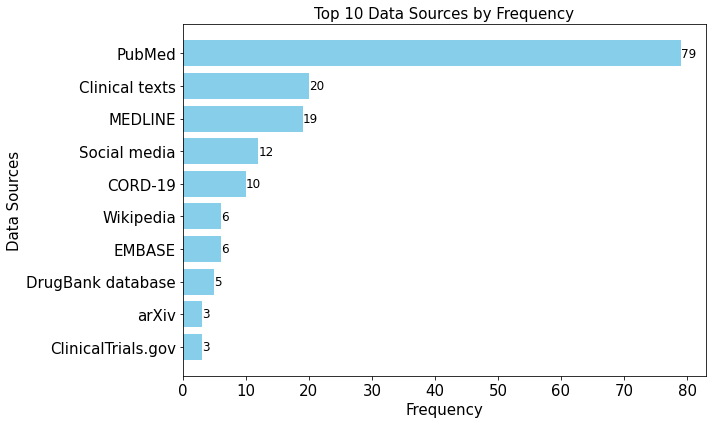

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_exploded is your DataFrame with the exploded data types and data_type_counts is the counts
# If not, you can adjust accordingly based on your DataFrame structure

# Get the top 10 data types and their counts, in descending order
top_10_data_types = data_type_counts.nlargest(10)

# Reverse the order
top_10_data_types = top_10_data_types[::-1]

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_data_types.index, top_10_data_types, color='skyblue')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Data Sources', fontsize=15)
plt.title('Top 10 Data Sources by Frequency', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/top_10_data_types_frequency.png')

# Display the chart
plt.show()


In [76]:
# Create a new column to store the flattened data types
df['Flattened_Data_Types'] = df['Data type'].str.split(', ')

# Explode the flattened data types into separate rows
df_exploded = df.explode('Flattened_Data_Types')

# Count the frequency of each data type
data_type_counts = df_exploded['Flattened_Data_Types'].value_counts()

# Print the frequency counts
# Adjust the maximum display options to show the full list
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the full list of data type counts
print(data_type_counts)

Abstracts                                                                                 91
Full-text                                                                                 35
Clinical notes                                                                            13
Patient discharge summaries                                                                8
Twitter                                                                                    6
Systematic Reviews                                                                         6
Wiki Articles                                                                              4
Reddit                                                                                     2
Sentences                                                                                  2
Cancer pathology reports                                                                   2
Askapatient.com                                                       

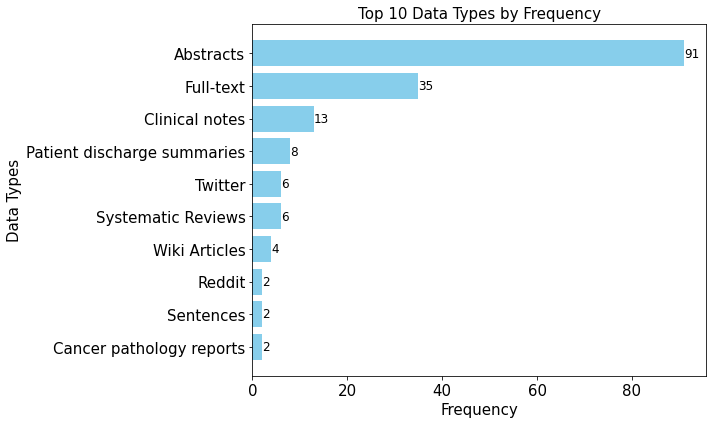

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_exploded is your DataFrame with the exploded data types and data_type_counts is the counts
# If not, you can adjust accordingly based on your DataFrame structure

# Get the top 10 data types and their counts, in descending order
top_10_data_types = data_type_counts.nlargest(10)

# Reverse the order
top_10_data_types = top_10_data_types[::-1]

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_data_types.index, top_10_data_types, color='skyblue')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Data Types', fontsize=15)
plt.title('Top 10 Data Types by Frequency', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/top_10_data_types_details_frequency.png')

# Display the chart
plt.show()


## Fine-tuning corpus data/task

In [78]:
# Create a new column to store the flattened data types
df['Flattened_Data_Types'] = df['Fine-tuning corpus data/task'].str.split('; ')

# Explode the flattened data types into separate rows
df_exploded = df.explode('Flattened_Data_Types')
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].str.strip()
#df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("PubMed Central (PMC) full-text articles", "PubMed Central (PMC)\nfull-text articles")

# Count the frequency of each data type
data_type_counts = df_exploded['Flattened_Data_Types'].value_counts()

# Print the frequency counts
# Adjust the maximum display options to show the full list
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the full list of data type counts
print(data_type_counts)

NCBI-disease                                                                                                                         18
Custom-annotated PubMed data                                                                                                         13
BC5CDR-disease                                                                                                                       13
BC2GM                                                                                                                                10
BC5CDR-chem                                                                                                                          10
DDIExtractions 2013                                                                                                                   9
CHEMPROT                                                                                                                              9
JNLPBA                                          

In [79]:
selected_rows = df_exploded[df_exploded["Flattened_Data_Types"].str.contains("custom", case=False, na=False)]
custom_datasets = selected_rows[['title', 'journal', 'Target application', 'year', 'Flattened_Data_Types', 'New annotations']]
selected_rows.shape

(47, 73)

In [80]:
custom_datasets_classification = custom_datasets[custom_datasets["Target application"].str.contains("classification", case=False, na=False)]
custom_datasets_classification.sort_values(by="Flattened_Data_Types")

,title,journal,Target application,year,Flattened_Data_Types,New annotations
103,A context-based framework for modeling the rol...,EMNLP,Text Classification,2019,"Custom-annotated ARC, NeurIPS, PubMed dataset",full-text annotations for the resource role ty...
74,Automating Quality Assessment of Medical Evide...,Journal of Medical Internet Research,Text Classification,2023,Custom-annotated Cochrane Reviews,"quality of evidence (RoB, imprecision, inconsi..."
102,CORA: A Deep Active Learning Covid-19 Relevanc...,Association for Computational Linguistics/ NLP...,Text Classification,2020,Custom-annotated Elsevier data,relevance annotation for the reserch question ...
38,Bat4RCT: A suite of benchmark data and baselin...,PLoS ONE [Electronic Resource],Text Classification,2023,Custom-annotated MEDLINE articles,RCT - yes or no
0,A Deep Learning Approach to Refine the Identif...,JMIR Research Protocols,Text Classification,2021,Custom-annotated PubMed data,"Article type: original study, systematic revie..."
12,The Classification of Short Scientific Texts U...,Studies in Health Technology & Informatics,Text Classification,2021,Custom-annotated PubMed data,Relevant or not for a systematic review in art...
21,An automated approach to identify scientific p...,Wellcome Open Research,Text Classification,2021,Custom-annotated PubMed data,Pharmacokinetics - papers that contain in vivo...
77,"Clinical study type classification, validation...",medRxiv,Text Classification,2022,Custom-annotated PubMed data,Abstracts were assigned one of the following s...
109,Detecting causal language use in science findings,EMNLP,Text Classification,2019,Custom-annotated PubMed data,annotated sentence with on of the casual relat...
54,Towards Automated Screening of Literature on A...,Studies in Health Technology & Informatics,Text Classification,2022,Custom-annotated abstracts from PubMed (MEDLIN...,if topic is artificial intelligence in nursing...


In [81]:
len(custom_datasets_classification)

15

In [82]:
custom_datasets_retrieval = custom_datasets[custom_datasets["Target application"].str.contains("retrieval", case=False, na=False)]
custom_datasets_retrieval.sort_values(by="Flattened_Data_Types")


,title,journal,Target application,year,Flattened_Data_Types,New annotations
116,Self-supervised context-aware COVID-19 documen...,Association for Computational Linguistics/ NLP...,Information Retrieval,2020,Custom-annotated CORD-19 (PubMed) with SIO lin...,samples consist of sentences and their\ntarget...
45,pubmedKB: an interactive web server for explor...,Nucleic Acids Research,Information Retrieval,2022,Custom-annotated ClinVar abstracts,ClinVar: sentence-level triplet of (genetic Va...
45,pubmedKB: an interactive web server for explor...,Nucleic Acids Research,Information Retrieval,2022,Custom-annotated DisGeNET articles,ClinVar: sentence-level triplet of (genetic Va...
9,LitCovid: an open database of COVID-19 literature,Nucleic Acids Research,Information Retrieval,2021,Custom-annotated PubMed data,"COVID-19 relevance, topic, geolocation and dru..."
120,Transitioning from benchmarks to a real-world ...,Association for Computational Linguistics/ Fin...,Information Retrieval,2023,Custom-annotated PubMed data,a practical use case simulating a search for V...
8,LitCovid in 2022: an information resource for ...,Nucleic Acids Research,Information Retrieval,2023,Custom-annotated PubMed dataset,Vaccines recognition and normalization dataset...
53,LiSA: an assisted literature search pipeline f...,BMC Medical Informatics & Decision Making,Information Retrieval,2022,Custom-annotated PubMed sentences,sentences labeled for three categories based o...
92,Querying across genres for medical claims in news,EMNLP,Information Retrieval,2020,Custom-annotated news-PubMed publications dataset,collected claims from news paired with researc...


In [83]:
custom_datasets_extraction = custom_datasets[custom_datasets["Target application"].str.contains("extraction", case=False, na=False)]
custom_datasets_extraction.sort_values(by="Flattened_Data_Types")


,title,journal,Target application,year,Flattened_Data_Types,New annotations
105,Evidence-based fact-checking of health-related...,Association for Computational Linguistics/ Fin...,Information Extraction,2021,Custom-annotated COVID-19 related claims Healt...,claims retrieved from the web; annotated evid...
59,Understanding Clinical Trial Reports: Extracti...,AMIA Summits on Translational Science Proceedings,Information Extraction,2021,Custom-annotated EBM-NLP abstracts,"ICO (intervention, comparator, outcome) elemen..."
94,Fine-grained information extraction from biome...,Association for Computational Linguistics,Information Extraction,2021,Custom-annotated PubMed and PMC data,covid-19 papers annotated for fine-grained ent...
35,EvidenceMap: a three-level knowledge represent...,Journal of the American Medical Informatics As...,Information Extraction,2023,Custom-annotated PubMed data,PICO elements and their dependencies in RCT ar...
1,Text mining-based word representations for bio...,PLoS ONE [Electronic Resource],Information Extraction,2021,Custom-annotated from GEO series,genomic predictors of response and survival in...
95,Multi-input multi-output sequence labeling for...,EMNLP,Information Extraction,2019,Custom-anotated BioCFE,manually annotated the fact and condition tupl...
99,Grantrel: Grant information extraction via joi...,Association for Computational Linguistics/ Fin...,Information Extraction,2021,custom-annotated Grant-SP and Grant-RE,manually selected the funding sentence and lab...
100,MedFilter: improving extraction of task-releva...,EMNLP,Information Extraction,2020,custom-annotated transcripts of real and de-id...,medically-relevant utterances in a given conve...


In [84]:
sorted_dataframe = custom_datasets_classification.sort_values(by="Flattened_Data_Types")

# Print the complete text content of "New annotations" column for the first row
print(sorted_dataframe['New annotations'].iloc[9])


if topic is artificial intelligence in nursing - relevant, else not


In [107]:
custom_datasets['Target application'].value_counts()


Text Classification             15
Information Extraction           8
Information Retrieval            8
Named Entity Recognition         5
Entity Normalization/Linking     3
Text Summarization               2
Knowledge Graph                  2
Similarity Clustering            1
Machine Reading Coprehension     1
Fact Verification                1
Multi-Domain                     1
Name: Target application, dtype: int64

In [86]:
custom_datasets['Flattened_Data_Types'].value_counts()

Custom-annotated PubMed data                                                                                         13
custom-annotated transcripts of real and de-identiﬁed doctor-patient conversations                                    1
Custom-annotated dataset of EMBASE                                                                                    1
Custom-annotated TCM-related abstracts                                                                                1
Custom-annotated news-PubMed publications dataset                                                                     1
Custom-annotated PubMed and PMC data                                                                                  1
Custom-anotated BioCFE                                                                                                1
custom-annotated Grant-SP and Grant-RE                                                                                1
Custom-annotated Elsevier data          

In [139]:
df = pd.concat([df_included, df_acl_included], ignore_index=True)
df['year'] = df['year'].astype(int)
df.shape

(141, 72)

In [95]:
df[['Biomedical Domain', 'Domain Details']] = df['Domain of automated approach'].str.split(':', 1, expand=True)
df[['Biomedical Domain Main', 'Biomedical Domain Additional']] = df['Biomedical Domain'].str.split('/', 1, expand=True)
#df[['Biomedical Domain Main']]

In [106]:
#df[['Biomedical Domain Main', 'Biomedical Domain Additional']] 

In [97]:
import textwrap

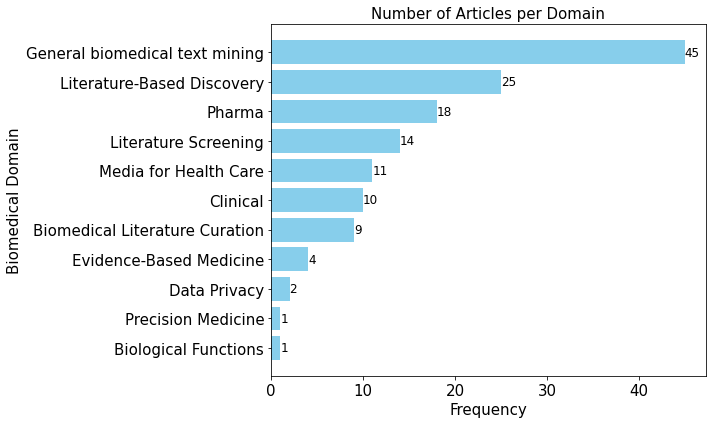

In [133]:
# Count the frequency of each category
#df['Biomedical Domain Main'] = df['Biomedical Domain Main'].replace("General biomedical text mining", "General biomedical \ntext mining")
#df['Biomedical Domain Main'] = df['Biomedical Domain Main'].replace("Biomedicla Literature Curation", "Biomedicla Literature \nCuration")
#df['Biomedical Domain Main'] = df['Biomedical Domain Main'].replace("Literature-Based Discovery", "Literature-Based \nDiscovery")

category_counts = df['Biomedical Domain Main'].value_counts()
top_n = 11

# Get the top 10 categories
top_10_categories = category_counts.head(top_n)

# Sort the categories in descending order
top_10_categories = top_10_categories.sort_values(ascending=True)

# Transpose the DataFrame
top_10_categories = top_10_categories.transpose()


# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_categories.index, top_10_categories, color='skyblue')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Biomedical Domain', fontsize=15)
plt.title('Number of Articles per Domain', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/number_of_papers_domain_count.png'.format(top_n))

# Display the chart
plt.show()



In [135]:
sum(category_counts)

140

In [121]:
df['Target application'].value_counts()

Text Classification             37
Relation Extraction             20
Multi-Domain                    17
Named Entity Recognition        15
Information Extraction          13
Information Retrieval           12
Entity Normalization/Linking     9
Text Summarization               4
Knowledge Graph                  3
Similarity Clustering            2
Other                            2
Machine Reading Coprehension     2
Question Answering               2
Fact Verification                2
Explainable AI                   1
Name: Target application, dtype: int64

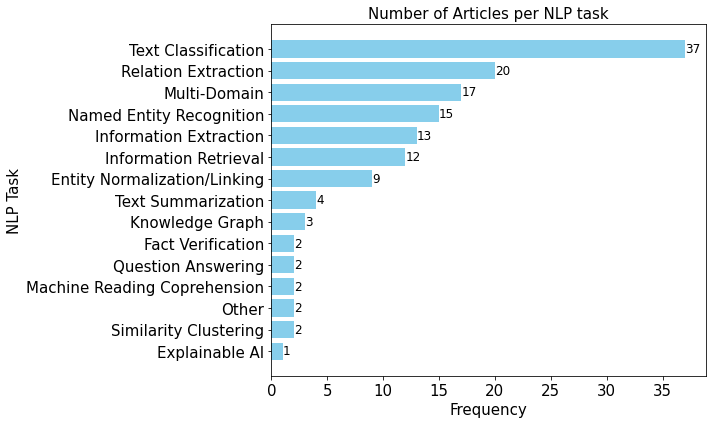

In [120]:
category_counts = df['Target application'].value_counts()
top_n = len(df['Target application'].value_counts()) # interested in all categories

# Get the top 10 categories
top_10_categories = category_counts.head(top_n)

# Sort the categories in descending order
top_10_categories = top_10_categories.sort_values(ascending=True)

# Transpose the DataFrame
top_10_categories = top_10_categories.transpose()


# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_categories.index, top_10_categories, color='skyblue')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('NLP Task', fontsize=15)
plt.title('Number of Articles per NLP task', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/target_NLP_application_count.png'.format(top_n))

# Display the chart
plt.show()

In [63]:
df.columns

Index(['author', 'doi', 'Link to paper', 'title', 'journal', 'year',
       'Extracted by', 'Included', 'Reason for exclusion',
       'Target application', 'Domain of automated approach',
       'Target database/ type of data  ', 'Hosted Application for End-users',
       'Alternative Approach', 'LLM Model', 'Models/Resources used with LLM',
       'System Architecture/ Flow', 'Programming language',
       'Library/Framework', 'Library/Framework Harmonized',
       'Reported performance metrics',
       'Reported performance metrics Harmonized', 'Source code availability',
       'Source code link', 'Data used availability', 'Preprocessing applied',
       'Pretraining corpus origin', 'Pretraining corpus size',
       'Fine-tuning corpus data/task', 'New dataset developed',
       'Fine-tuning corpus size',
       'Number of tasks/datasets for performance evaluation',
       'Hardware used for training/validation/fine-tuning', 'Hardware type',
       'Internal validity 1', 'Internal 

In [65]:
#df['Target database/ type of data'] = df['Target database/ type of data'].replace("PubMed Central (PMC) full-text articles", "PubMed Central (PMC)\nfull-text articles")

# Create a new column to store the flattened data types
df['Flattened_Data_Types'] = df['Target database/ type of data  '].str.split(', ')

# Explode the flattened data types into separate rows
df_exploded = df.explode('Flattened_Data_Types')
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("PubMed Central (PMC) full-text articles", "PubMed Central (PMC)\nfull-text articles")

# Count the frequency of each data type
data_type_counts = df_exploded['Flattened_Data_Types'].value_counts()

# Print the frequency counts
# Adjust the maximum display options to show the full list
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the full list of data type counts
print(data_type_counts)

PubMed abstracts                                                                                     60
PubMed Central (PMC)\nfull-text articles                                                             20
COVID-19 Literature                                                                                   9
Clinical notes                                                                                        8
TODO                                                                                                  7
Twitter                                                                                               6
MEDLINE                                                                                               5
Wikipedia                                                                                             4
Patient discharge summaries                                                                           3
MEDLINE abstracts                                               

## LLMs

In [164]:
df.head()

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,Domain of automated approach,Target database,Data type,Data filter applied,Hosted Application for End-users,Alternative Approach,LLM Model,Models/Resources used with LLM,System Architecture/ Flow,Programming language,Library/Framework,Library/Framework Harmonized,Reported performance metrics,Reported performance metrics Harmonized,Source code availability,Source code link,Data used availability,Preprocessing applied,Pretraining corpus origin,Pretraining corpus size,Fine-tuning corpus data/task,New annotations,Annotations type,New dataset developed,Fine-tuning corpus size,Number of tasks/datasets for performance evaluation,Hardware used for training/validation/fine-tuning,Hardware type,Internal validity 1,Internal validity 2,External validity,External validity.1,Comment,Unnamed: 43,url,label,type,abstract,address,accession,Link,issue,keywords,language,issn,pages,volume,DA,DB,DP,ID,j2,m3,n1,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40,Flattened_Models
0,"Abdelkader, W. and Navarro, T. and Parrish, R....",10.2196/29398,https://doi.org/10.2196/29398,A Deep Learning Approach to Refine the Identif...,JMIR Research Protocols,2021,BVI,1.0,NaN,Text Classification,Literature Screening: improve the precision of...,PubMed,Abstracts,NaN,no,NaN,"BERT, BioBERT, BlueBERT, PubMedBERT",NaN,BERT architecture,python,HuggingFace,HuggingFace,"F1, recall, specificity, accuracy, precision, ...","F1-Score, Recall, Specificity, Accuracy, Preci...",no,NaN,on request,Not reported,depends on BERT model,depends on BERT model,Custom-annotated PubMed data,"Article type: original study, systematic revie...",NaN,yes,"Total 2012–2020, N=160 712 (positive 29810 and...",1.0,"8 Intel Silver 4216 Cascade Lake CPU cores, an...","CPU, GPU",Yes,No,No,NaN,Protocol!,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Abdelkader_2021_JMIRReseProt,JOUR,BACKGROUND: A barrier to practicing evidence-b...,"Abdelkader, Wael. Health Information Research ...",34847061.0,NaN,11.0,NaN,English,1929-0748,e29398,10.0,2023-11-29 00:00:00,MEDLINE,Ovid Technologies,15.0,JMIR Res Protoc,NaN,"Abdelkader, Wael Navarro, Tamara Parrish, Rick...",A Deep Learning Approach to Refine the Identif...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,"[BERT, BioBERT, BlueBERT, PubMedBERT]"
1,"Alachram, H. and Chereda, H. and Beisbarth, T....",10.1371/journal.pone.0258623,https://doi.org/10.1371/journal.pone.0258623,Text mining-based word representations for bio...,PLoS ONE [Electronic Resource],2021,BVI,1.0,NaN,Information Extraction,General biomedical text mining/ Genomics: Extr...,"PubMed, Gene Expression Omnibus repository","Abstracts, Functional Genomics",NaN,yes: https://ebiomecon.genexplain.com/,NaN,BioBERT,Graph-CNN based on Human Protein Reference Dat...,BERT architecture,python,PyTorch,PyTorch,"AUC, Accuracy, F1, similarity threshold","AUC, Accuracy, F1-Score, Similarity Threshold",no,NaN,NaN,for word2vec training: The first phase applied...,for word2vec PubMed FTP repository,"16,558,093 article abstracts",HPRD PPI; Custom-annotated from GEO series,genomic predictors of response and survival in...,NaN,yes,10 microarray datasets measured on Affymetrix ...,"4 (lung cancer, liver cancer, prostate cancer,...",Not reported,NaN,Yes,No,yes,word2vec,NaN,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Alachram_2021_PLoONE.ElRes,JOUR,Biomedical and life science literature is an e...,"Alachram, Halima. Department of Medical Bioinf...",34653224.0,NaN,10.0,Algorithms and *Breast Neoplasms/ge [Genetics]...,English,1932-6203,e0258623,16.0,NaN,MEDLINE,Ovid Technologies,101.0,PLoS ONE,"Research Support, Non-U.S. Gov't","Alachram, Halima Chereda, Hryhorii Beisbarth, ...",Text mining-based word representations for bio...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,[BioBERT]
2,"Ambalavanan, A. K. and Devarakonda, M. V.",10.1016/j.jbi.2020.103578,https://doi.org/10.1016/j.jbi.2020.103578,Using the conte

In [165]:
# Create a new column to store the flattened data types
df['Flattened_Models'] = df['LLM Model'].str.split(', ')

# Explode the flattened data types into separate rows
df_exploded = df.explode('Flattened_Models')

# Count the frequency of each data type
data_type_counts = df_exploded['Flattened_Models'].value_counts()

# Print the frequency counts
# Adjust the maximum display options to show the full list
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the full list of data type counts
print(data_type_counts)

BioBERT                         65
BERT                            61
SciBERT                         20
PubMedBERT                      19
BlueBERT                        12
RoBERTa                          8
ClinicalBERT                     7
DistilBERT                       4
ELECTRA                          3
ALBERT                           3
BioClinicalBERT                  3
COVID-Twitter-BERT               3
Bioformer                        2
T5                               2
XLNet                            2
SPECTER                          2
Sentence-BERT                    2
MentalRoBERTa                    2
BERN                             2
NCBI BERT                        2
R-BERT                           1
Pegasus Cochrane                 1
SpanBERT                         1
BART XSUM                        1
BART Cochrance                   1
BioBART Cochrane                 1
Pegasus XSUM                     1
Pegasus PubMed                   1
BigBird Pegasus PubM

In [175]:
df_year_model = df_exploded[["year", "Flattened_Models"]]

# Group by year and model, and count occurrences
year_model_counts = df_year_model.groupby(['year', 'Flattened_Models']).size().reset_index(name='counts')

# For each year, find the top 5 models
top5_per_year = year_model_counts.groupby('year').apply(lambda x: x.nlargest(5, 'counts')).reset_index(drop=True)

# Pivot this data for plotting
pivot_data = top5_per_year.pivot(index='year', columns='Flattened_Models', values='counts').fillna(0)
pivot_data.head()

Flattened_Models,ASPIRE,BERT,BioBERT,BlueBERT,ClinicalBERT,NCBI BERT,PubMedBERT,RoBERTa,SciBERT
year,,,,,,,,,
2019,0.0,10.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0
2020,0.0,19.0,14.0,0.0,4.0,0.0,0.0,5.0,7.0
2021,0.0,15.0,23.0,5.0,0.0,0.0,5.0,0.0,5.0
2022,0.0,13.0,19.0,5.0,0.0,0.0,10.0,0.0,5.0
2023,1.0,4.0,5.0,0.0,0.0,0.0,3.0,0.0,3.0


<Figure size 864x576 with 0 Axes>

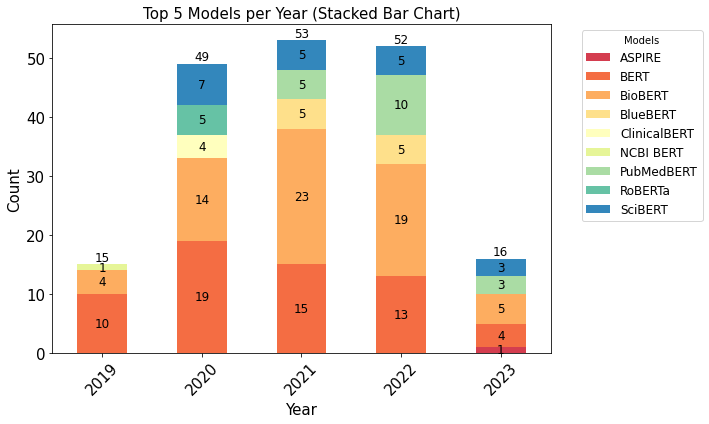

In [237]:
pastel_palette = sns.color_palette("Spectral", len(pivot_data.columns))

plt.figure(figsize=(12, 8))
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=pastel_palette)

# Adding data labels inside the bars
for rect in ax.patches:
    # Find where to place the label
    y_value = rect.get_y() + rect.get_height() / 2
    x_value = rect.get_x() + rect.get_width() / 2

    # Get the value to label
    value = int(rect.get_height())

    # Only label bars with a value
    if value > 0:
        ax.annotate(value, (x_value, y_value), ha='center', va='center', fontsize=12)

# Adding total label on top of each bar
for i, total in enumerate(pivot_data.sum(axis=1)):
    ax.text(i, total, str(int(total)), ha='center', va='bottom', fontsize=12)

plt.title("Top 5 Models per Year (Stacked Bar Chart)",fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xticks(rotation=45)
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.savefig('viz/LLM_models_top5_per_year.png'.format(top_n))
plt.show()

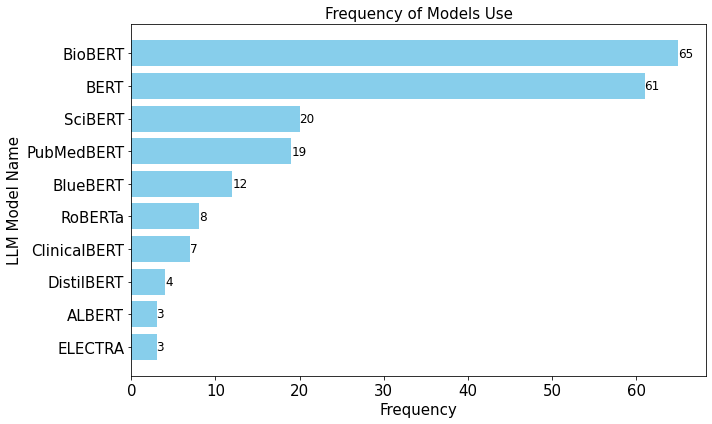

In [232]:
# Get the top 10 categories
top_10_categories = data_type_counts.head(10)

# Sort the categories in descending order
top_10_categories = top_10_categories.sort_values(ascending=True)

# Transpose the DataFrame
top_10_categories = top_10_categories.transpose()

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_categories.index, top_10_categories, color='skyblue')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('LLM Model Name', fontsize=15)
plt.title('Frequency of Models Use', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/LLM_models_top_10.png'.format(top_n))

# Display the chart
plt.show()

In [202]:
df_year_model_list = df[["year", "Flattened_Models"]]

In [207]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

/var/folders/px/wtj901jn7z9f26xgbys4l7jh0000gp/T/ipykernel_30409/2013704464.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/px/wtj901jn7z9f26xgbys4l7jh0000gp/T/ipykernel_30409/2013704464.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



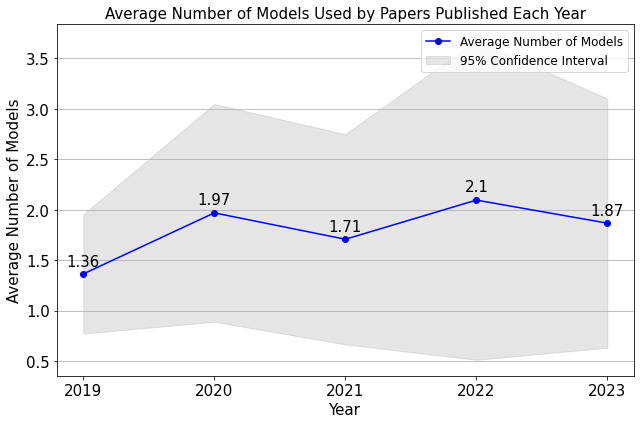

In [238]:
# Convert the "year" column to integers
df_year_model_list['year'] = df_year_model_list['year'].astype(int)

# Calculate the number of models used by each paper
df_year_model_list['Num_Models_Used'] = df_year_model_list['Flattened_Models'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Calculate the average number of models for each year
yearly_avg = df_year_model_list.groupby('year')['Num_Models_Used'].mean()

# Calculate the confidence intervals for the averages
yearly_std = df_year_model_list.groupby('year')['Num_Models_Used'].std()
confidence_interval = stats.norm.interval(0.95, loc=yearly_avg, scale=yearly_std / np.sqrt(df_year_model_list['year'].nunique()))

# Create a DataFrame for the results
result_df = pd.DataFrame({
    "Year": yearly_avg.index,
    "Average_Num_Models": yearly_avg.values,
    "Lower_CI": confidence_interval[0],
    "Upper_CI": confidence_interval[1]
})

# Create a line graph with confidence intervals
plt.figure(figsize=(9, 6))
plt.plot(result_df['Year'], result_df['Average_Num_Models'], marker='o', label='Average Number of Models', color='b')
plt.fill_between(result_df['Year'], result_df['Lower_CI'], result_df['Upper_CI'], color='grey', alpha=0.2, label='95% Confidence Interval')

plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xticks(result_df['Year'])  # Set the x-axis ticks to match the "Year" values
plt.title("Average Number of Models Used by Papers Published Each Year", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Number of Models", fontsize=15)
plt.legend(fontsize=12)
plt.grid(axis='y')  # Enable grid only on the y-axis

# Annotate each data point with rounded values
for i, row in result_df.iterrows():
    plt.text(row['Year'], round(row['Average_Num_Models'], 2) + 0.05, round(row['Average_Num_Models'], 2), ha='center', va='bottom', fontsize=15)
    
plt.savefig('viz/LLM_number_per_paper_over_time.png'.format(top_n))

plt.tight_layout()
plt.show()

In [224]:
result_df

,Year,Average_Num_Models,Lower_CI,Upper_CI
0,2019,1.363636,0.772685,1.954588
1,2020,1.968750,0.889836,3.047664
2,2021,1.707317,0.665694,2.748940
3,2022,2.095238,0.512878,3.677598
4,2023,1.866667,0.632994,3.100340


## Technical Details

In [279]:
df_technical_setup = df[["Library/Framework Harmonized", "Hardware type", "Programming language"]]

In [280]:
df_technical_setup.head()

,Library/Framework Harmonized,Hardware type,Programming language
0,HuggingFace,"GPU, CPU",Python
1,PyTorch,NaN,Python
2,PyTorch,GPU,Python
3,HuggingFace,NaN,Python
4,NaN,TPU,NaN


In [281]:
nan_count = df_technical_setup.isna().sum()

# Print the results
print(nan_count)


Library/Framework Harmonized    45
Hardware type                   79
Programming language            27
dtype: int64


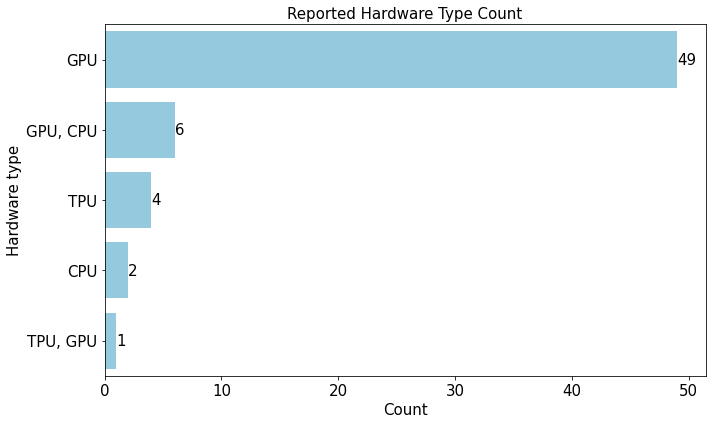

In [284]:
# Get the count of unique values in the "Hardware type" column
hardware_type_counts = df['Hardware type'].value_counts()

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=hardware_type_counts.values, y=hardware_type_counts.index, color='skyblue')

# Add labels to each bar
for bar, count in zip(bars.patches, hardware_type_counts.values):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{count}', va='center', fontsize=15)

plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Hardware type', fontsize=15)
plt.title('Reported Hardware Type Count', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/hardware_type_count.png')

# Display the chart
plt.show()

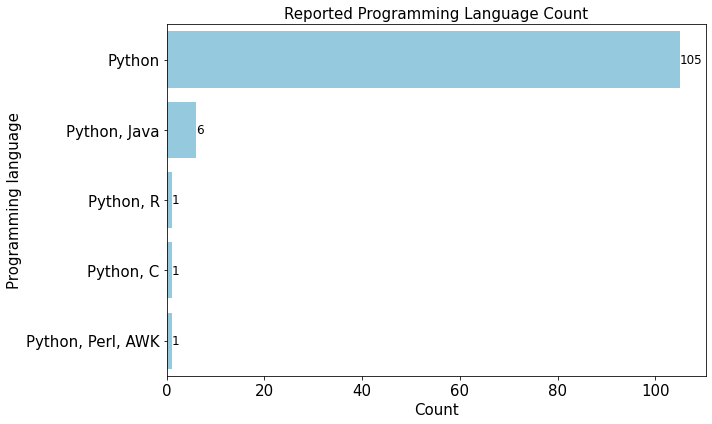

In [285]:
# Get the count of unique values in the "Programming language" column
programming_language_counts = df['Programming language'].value_counts()

# Create a horizontal bar chart for the unique values in the "Programming language" column
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=programming_language_counts.values, y=programming_language_counts.index, color='skyblue')

# Add labels to each bar
for bar, count in zip(bars.patches, programming_language_counts.values):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{count}', va='center', fontsize=12)

plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Programming language', fontsize=15)
plt.title('Reported Programming Language Count', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/programming_language_count.png')

# Display the chart
plt.show()

## Sanky Diagram

In [122]:
%pip install pySankey

DEPRECATION: prodigy 1.11.8 has a non-standard dependency specifier srsly>=2.0.0<3.0.0. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of prodigy or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [123]:
%pip install webcolors

DEPRECATION: prodigy 1.11.8 has a non-standard dependency specifier srsly>=2.0.0<3.0.0. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of prodigy or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [140]:
df_sanky = pd.read_csv("data/domain_application_count.csv") # comes from PowerBI

In [148]:
grouped_df = df_sanky.groupby("Title domain of automated approach.1")["Sum of Included"].sum()

# Sorting and getting the top 5
top_5 = grouped_df.sort_values(ascending=False).head(5)
top_5_titles = top_5.index.tolist()
top_5_titles

['General biomedical text mining',
 'Literature-Based Discovery',
 'Pharma',
 'Literature Screening',
 'Media for Health Care']

In [125]:
df_sanky

,Title domain of automated approach.1,Target application,Sum of Included
0,Pharma,Relation Extraction,12
1,Literature Screening,Text Classification,11
2,General biomedical text mining,Multi-Domain,7
3,General biomedical text mining,Named Entity Recognition,7
4,Literature-Based Discovery,Information Retrieval,6
5,General biomedical text mining,Entity Normalization/Linking,5
6,General biomedical text mining,Relation Extraction,4
7,Biomedical Literature Curation,Text Classification,4
8,Literature-Based Discovery,Knowledge Graph,3
9,General biomedical text mining,Information Extraction,2


In [149]:
filtered_df_sanky = df_sanky[df_sanky["Title domain of automated approach.1"].isin(top_5_titles)]
filtered_df_sanky

,Title domain of automated approach.1,Target application,Sum of Included
0,General biomedical text mining,Multi-Domain,13
1,Pharma,Relation Extraction,13
2,Literature Screening,Text Classification,11
3,Literature-Based Discovery,Information Retrieval,10
4,General biomedical text mining,Named Entity Recognition,9
5,General biomedical text mining,Entity Normalization/Linking,8
8,General biomedical text mining,Information Extraction,5
9,General biomedical text mining,Relation Extraction,5
10,Media for Health Care,Text Classification,5
11,Literature-Based Discovery,Text Summarization,4


In [150]:
l1 = filtered_df_sanky["Title domain of automated approach.1"].to_list()
l2 = filtered_df_sanky["Target application"].to_list()
connect_values = filtered_df_sanky["Sum of Included"].to_list()
levels_combined = list(set(l1+l2))
levels_combined

['Pharma',
 'Relation Extraction',
 'Information Extraction',
 'Knowledge Graph',
 'Question Answering',
 'Named Entity Recognition',
 'Information Retrieval',
 'Fact Verification',
 'Machine Reading Coprehension',
 'Entity Normalization/Linking',
 'Literature Screening',
 'General biomedical text mining',
 'Similarity Clustering',
 'Text Summarization',
 'Other',
 'Literature-Based Discovery',
 'Text Classification',
 'Media for Health Care',
 'Multi-Domain']

In [151]:
#node_label = ["A1", "A2", "B1", "B2","B3", "C1", "C2"]
node_dict = {y:x for x, y in enumerate(levels_combined)}
node_dict

{'Pharma': 0,
 'Relation Extraction': 1,
 'Information Extraction': 2,
 'Knowledge Graph': 3,
 'Question Answering': 4,
 'Named Entity Recognition': 5,
 'Information Retrieval': 6,
 'Fact Verification': 7,
 'Machine Reading Coprehension': 8,
 'Entity Normalization/Linking': 9,
 'Literature Screening': 10,
 'General biomedical text mining': 11,
 'Similarity Clustering': 12,
 'Text Summarization': 13,
 'Other': 14,
 'Literature-Based Discovery': 15,
 'Text Classification': 16,
 'Media for Health Care': 17,
 'Multi-Domain': 18}

In [152]:
source = l1 #['A1','A1','A1','A2','A2','A2','B1','B2','B2','B3','B3']
target = l2 #['B1','B2','B3','B1','B2','B3','C1','C1','C2','C1','C2'] 
values = connect_values #[ 10, 5, 15, 5, 20, 45, 15, 20, 5, 30, 30 ]

In [153]:
source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]

In [154]:
#source_node

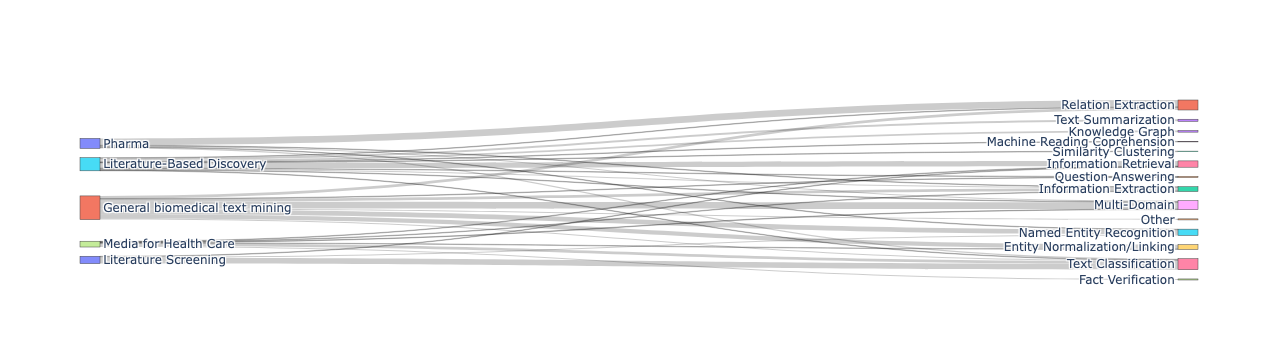

In [162]:
import plotly.graph_objects as go # Import the graphical object

fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            label = levels_combined
        ),
        # This part is for the link information
        link = dict(
            source = source_node,
            target = target_node,
            value = values
        ))])

# With this save the plots 
plot(fig,
     image_filename='sankey_plot_1', 
     image='png', 
     image_width=900, 
     image_height=600
)
# And shows the plot
fig.show()

# Abstracts Clustering

In [3]:
!pip install wordcloud

In [4]:
df = pd.read_excel("Scoping_review_text-analysis_extraction.xlsx", sheet_name="Harmonized Information Included")

In [324]:
df.head()

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,Domain of automated approach,Target database/ type of data,Hosted Application for End-users,Alternative Approach,LLM Model,Models/Resources used with LLM,System Architecture/ Flow,Programming language,Library/Framework,Library/Framework Harmonized,Reported performance metrics,Reported performance metrics Harmonized,Source code availability,Source code link,Data used availability,Preprocessing applied,Pretraining corpus origin,Pretraining corpus size,Fine-tuning corpus data/task,New dataset developed,Fine-tuning corpus size,Number of tasks/datasets for performance evaluation,Hardware used for training/validation/fine-tuning,Hardware type,Internal validity 1,Internal validity 2,External validity,External validity.1,Comment,abstract,Preprocessed_Abstract
1,"Alachram, H. and Chereda, H. and Beisbarth, T....",10.1371/journal.pone.0258623,https://doi.org/10.1371/journal.pone.0258623,Text mining-based word representations for bio...,PLoS ONE [Electronic Resource],2021,BVI,1,NaN,Information Extraction,Embedding representations for bio knowledge/Ge...,"PubMed abstracts, GEO genomics data",yes: https://ebiomecon.genexplain.com/,NaN,BioBERT,Graph-CNN based on Human Protein Reference Dat...,BERT architecture,python,PyTorch,PyTorch,"AUC, Accuracy, F1, similarity threshold","AUC, Accuracy, F1-Score, Similarity Threshold",no,NaN,NaN,for word2vec training: The first phase applied...,for word2vec PubMed FTP repository,"16,558,093 article abstracts",Microarray data sets on breast cancer measured...,yes,10 microarray datasets measured on Affymetrix ...,"4 (lung cancer, liver cancer, prostate cancer,...",Not reported,NaN,Yes,No,yes,word2vec,NaN,Biomedical and life science literature is an e...,biomedical life science literature essential w...
2,"Ambalavanan, A. K. and Devarakonda, M. V.",10.1016/j.jbi.2020.103578,https://doi.org/10.1016/j.jbi.2020.103578,Using the contextual language model BERT for m...,Journal of Biomedical Informatics,2020,BVI,1,NaN,Text Classification,Evidence-Based Medicine: Screening scientific ...,MEDLINE abstracts (Clinical Hedges),no,NaN,SciBERT,feed forward network (FFN) as the text classif...,BERT architecture,python,PyTorch,PyTorch,"Precision, Recall, F1","Precision, Recall, F1-Score",yes,https://github.com/md-labs/Clinical_Hedges_BERT,yes,Not reported,see SciBERT,see SciBERT,Clinical Hedges Dataset,no,"50,590 entries",NaN,GPU,GPU,Yes,No,yes,"CNN, Customized text query",Clinical Hedges dataset could be relevant for ...,BACKGROUND: Finding specific scientific articl...,background finding specific scientific article...
3,"Asada, M. and Miwa, M. and Sasaki, Y.",10.1093/bioinformatics/btac754,https://doi.org/10.1093/bioinformatics/btac754,Integrating heterogeneous knowledge graphs int...,Bioinformatics,2023,BVI,1,NaN,Relation Extraction,Pharma/ Drug-Drug Interaction: Drug-drug inter...,DrugBank database and MEDLINE abstracts,no,NaN,"BERT, ChemBERT, PubMedBERT",Heterogeneous knowledge graphs,BERT architecture,python,HuggingFace,HuggingFace,"Mean reciprokal rank, hits@1, 3, and 10, F1, p...","Mean Reciprocal Rank, Hits@1, 3, and 10, F1-Sc...",yes,https://github.com/tticoin/HKG-DDIE.git,yes,Yes,see BERT models,see BERT models,DDIExtraction-2013 Shared Task; the BioCreativ...,no,20988 records (re-check),NaN,Not reported,NaN,Yes,No,yes,"CNN, Bi-LSTM, SciFice-Large",NaN,MOTIVATION: Most of the conventional deep neur...,motivation conventional deep neural network ba...
4,"Aum, S. and Choe, S.",10.1186/s13643-021-01763-w,https://doi.org/10.1186/s13643-021-01763-w,srBERT: automatic article classification model...,Systematic Reviews,2021,BVI,1,NaN,Text Classification,Evidence-Based Medicine: Screening scientific ...,not clear,no,NaN,BERT,NaN,BERT architecture,Not reported,NaN,NaN,"AUC, Accuracy, Precision, Recall, F1, Loss","AUC, Accuracy, Precision, Recall, F1-Score, Loss",yes,https://github.com/SEONCHOE/,NaN,Not reported,Data

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/donevas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/donevas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/Users/donevas/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


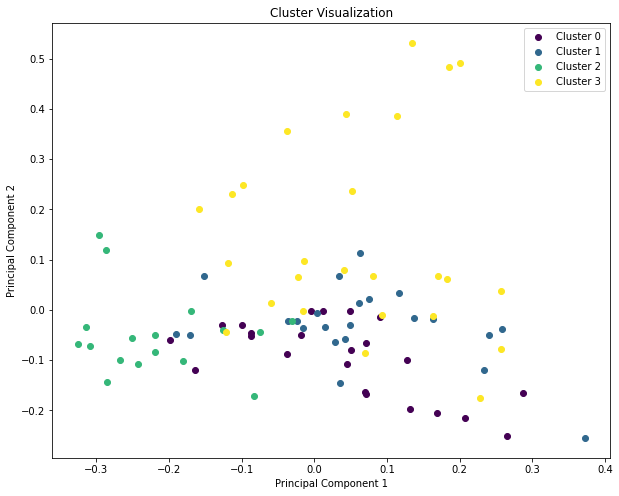

In [5]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 2: Preprocess the abstracts (tokenization, lowercase, stop words removal, etc.)
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove non-alphanumeric characters
    text = re.sub(r'\W+', ' ', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lowercase conversion
    tokens = [token.lower() for token in tokens]
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Remove the word 'model'
    #tokens = [token for token in tokens if token != 'model']
    #tokens = [token for token in tokens if token != 'method']
    #tokens = [token for token in tokens if token != 'task']

    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

df['Preprocessed_Abstract'] = df['abstract'].apply(preprocess_text)

# Step 3: Vectorize the abstracts
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Preprocessed_Abstract'])

# Step 4: Choose a clustering algorithm (K-means in this example)
num_clusters = 4  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Step 5: Apply the clustering algorithm
# List of cluster labels
cluster_labels = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# List of unique cluster labels
unique_clusters = np.unique(cluster_labels)

# List of colors for each cluster label
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

# Create a larger figure
plt.figure(figsize=(10, 8))

# Scatter plot of PCA-transformed data points with cluster labels as colors
for cluster_label, color in zip(unique_clusters, colors):
    mask = cluster_labels == cluster_label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], color=color, label=f'Cluster {cluster_label}')

plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('Visuals/cluster_vis_tfidf_pca.png')  # Change the format and resolution as needed
plt.show()


In [143]:
cluster_counts = pd.Series(cluster_labels).value_counts()

# Print the number of documents in each cluster
for i, count in cluster_counts.items():
    print(f"Cluster {i}: {count} documents")

Cluster 0: 39 documents
Cluster 3: 19 documents
Cluster 1: 16 documents
Cluster 2: 15 documents


### dynamic exploration

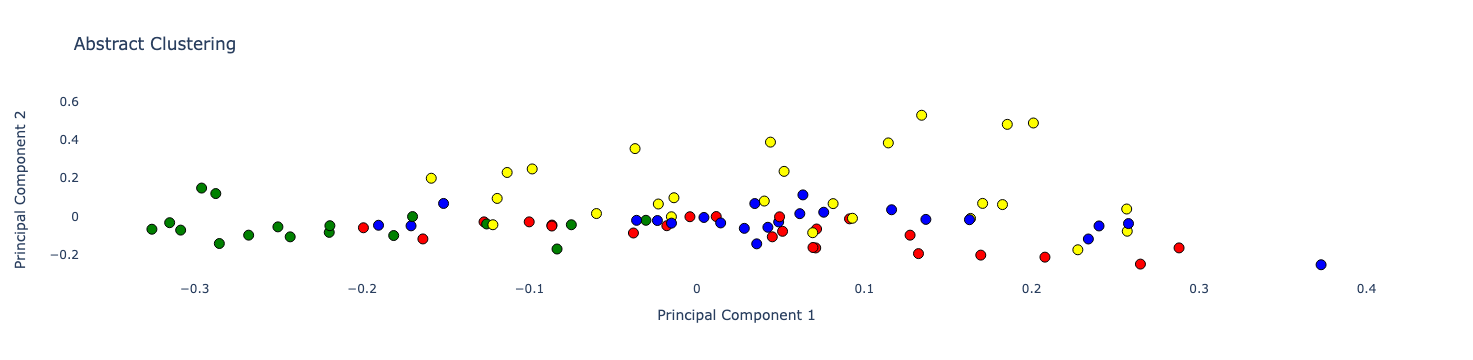

In [22]:
df['Cluster'] = cluster_labels

import plotly.graph_objects as go # Import the graphical object
import plotly.colors as colors


# Define custom colors for each cluster label
cluster_colors = ['red', 'blue', 'green', 'yellow', 'orange']

fig = go.Figure(data=go.Scatter(
    x=X_pca[:, 0], y=X_pca[:, 1],
    mode='markers',
    marker=dict(
        color=[cluster_colors[label] for label in cluster_labels],
        size=10,  # Adjust the marker size here
        line=dict(width=1, color='Black')
    ),
    hovertemplate='<b>Title:</b> %{text}',
    text=df['title']
))


# Set plot title and axis labels
fig.update_layout(
    title='Abstract Clustering',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    plot_bgcolor='white'  # Set the background color to white
)

plot(fig,
     image_filename='abstracts_cluster_bert_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=800
)

# Show the plot
fig.show()



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


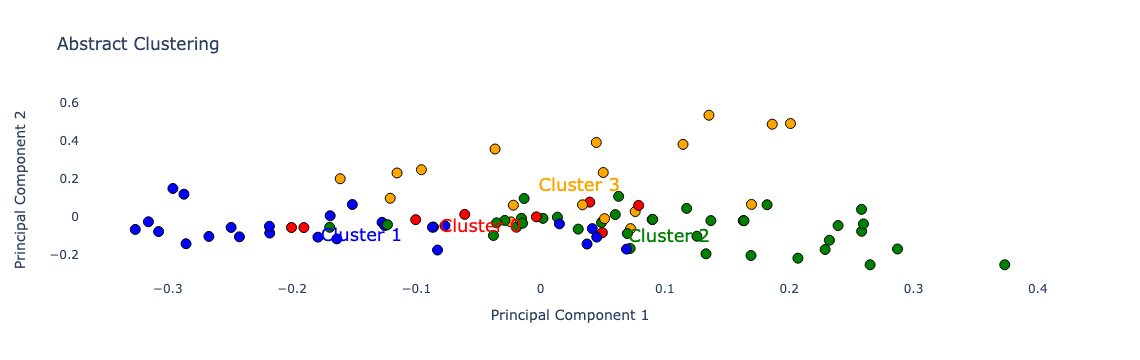

In [157]:
import plotly.graph_objects as go

# Define custom colors for each cluster label
cluster_colors = ['red', 'blue', 'green', 'orange', 'orange']

# Define cluster names (you can customize this based on your requirement)
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

fig = go.Figure()

# Add scatter plot for data points
fig.add_trace(go.Scatter(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    mode='markers',
    marker=dict(
        color=[cluster_colors[label] for label in cluster_labels],
        size=10,  # Adjust the marker size here
        line=dict(width=1, color='Black')
    ),
    hovertemplate='<b>Title:</b> %{text}',
    text=df['title'],
    showlegend=False  # Hide the legend for data points
))

# Add text annotations for cluster names
for i, name in enumerate(cluster_names):
    cluster_x = X_pca[cluster_labels == i, 0].mean()  # Calculate mean x position for the cluster
    cluster_y = X_pca[cluster_labels == i, 1].mean()  # Calculate mean y position for the cluster
    fig.add_trace(go.Scatter(
        x=[cluster_x],
        y=[cluster_y],
        mode='text',
        text=[name],
        showlegend=False,
        textposition='bottom center',
        textfont=dict(size=18, color=cluster_colors[i])  # Set the text font size to 18 (you can adjust this value)
    ))

# Set plot title and axis labels
fig.update_layout(
    title='Abstract Clustering',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    plot_bgcolor='white'  # Set the background color to white
)

plot(fig,
     image_filename='abstracts_cluster_bert_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=600
)

# Show the plot
fig.show()


### word clouds

In [152]:
from wordcloud import WordCloud

In [91]:
term_frequencies[0, tfidf_vectorizer.vocabulary_['model']]

4.040498806970412

In [115]:
# Calculate the sum of TF-IDF scores for each term
term_scores = np.sum(tfidf_matrix, axis=0)

# Get the vocabulary indices for the terms
vocab_indices = np.array(list(tfidf_vectorizer.vocabulary_.values()))

# Sort the terms based on their sum of TF-IDF scores in descending order
sorted_indices = np.argsort(-term_scores[0, vocab_indices])

# Get the top 10 most frequent words
top_10_indices = sorted_indices[0, : 10]
top_10_words = [tfidf_vectorizer.get_feature_names_out()[vocab_indices[i]] for i in top_10_indices]
top_10_words

[array([['biomedical', 'model', 'drug', 'text', 'bert', 'models', 'task',
         'extraction', 'performance', 'literature']], dtype=object)]

In [113]:
sorted_indices

matrix([[   9,  107,  405, ..., 2603, 2585, 2573]])

In [88]:
average_frequency

781.4946129017154

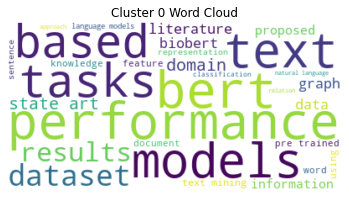

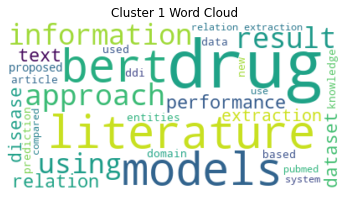

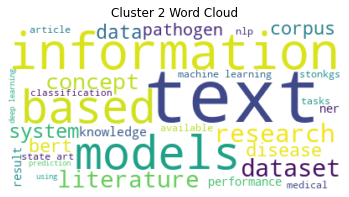

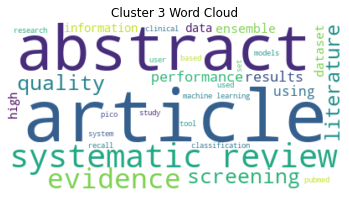

In [154]:
cluster_labels = kmeans.labels_

# Step 8: Calculate term frequencies across all clusters
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Preprocessed_Abstract'])

# Calculate the term frequencies
term_frequencies = np.sum(tfidf_matrix, axis=0)

threshold = 3

words_to_remove = ['method', 'task', 'model', 'methods', 'biomedical']

for i in range(num_clusters):
    cluster_abstracts = df.loc[df['Cluster'] == i, 'Preprocessed_Abstract']
    cluster_text = ' '.join(cluster_abstracts)
    cluster_text = ' '.join(word for word in cluster_text.split() if word not in words_to_remove)

    
    # Generate the word cloud
    wordcloud = WordCloud(background_color='white', max_words=30).generate(cluster_text)
    
    # Apply the term frequency threshold
    word_frequencies = wordcloud.process_text(cluster_text)
    # Apply the term frequency threshold
    filtered_words = [word for word in word_frequencies.keys() if word in tfidf_vectorizer.vocabulary_ and term_frequencies[0, tfidf_vectorizer.vocabulary_[word]] <= threshold]
    #print(filtered_words)
    #wordcloud.words_ = {word: freq for word, freq in word_frequencies.items() if word in filtered_words}
    #print(wordcloud.words_)

    
    # Plot the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {i} Word Cloud')
    plt.savefig('Visuals/word_cloud_cluster_{}.png'.format(i))  # Change the format and resolution as needed
    plt.show()

In [77]:
tfidf_vectorizer.vocabulary_['motivation']

1739

In [78]:
term_frequencies[0, 1739]

0.43660389232414387

In [134]:
# Sort the dictionary items based on their values in descending order
sorted_items = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 dictionary objects (key-value pairs) based on the values
top_10_dict_objects = dict(sorted_items[:10])

print(top_10_dict_objects)

{'models': 28, 'quality': 27, 'systematic review': 26, 'evidence': 22, 'screening': 20, 'article': 20, 'abstract': 19, 'dataset': 18, 'using': 17, 'high': 16}


### using bioBERT embeddings

In [7]:
from transformers import AutoModel, AutoTokenizer

In [39]:
# Step 3: Load BioBERT model and tokenizer
#model_name = "dmis-lab/biobert-base-cased-v1.1"
#model = AutoModel.from_pretrained(model_name)
#tokenizer = AutoTokenizer.from_pretrained(model_name)

# Step 3: Load PubMedBERT model and tokenizer
model_name = "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract"
model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Step 4: Tokenize and encode the texts
encoded_inputs = tokenizer(df['Preprocessed_Abstract'].tolist(), padding=True, truncation=True, return_tensors="pt")

# Step 5: Obtain the embeddings from BioBERT
outputs = model(**encoded_inputs)
embeddings = outputs.last_hidden_state

# Reshape the embeddings to have two dimensions
embeddings_2d = embeddings[:, 0, :].detach().numpy()

# Step 6: Apply the clustering algorithm (K-means in this example)
num_clusters = 4  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(embeddings_2d)

# Step 7: Assign cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_


Some weights of the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Asking to truncate to max_length but no maximum length is provided and the model has no 

In [40]:
cluster_counts = pd.Series(cluster_labels).value_counts()

# Print the number of documents in each cluster
for i, count in cluster_counts.items():
    print(f"Cluster {i}: {count} documents")

Cluster 1: 43 documents
Cluster 3: 19 documents
Cluster 2: 17 documents
Cluster 0: 10 documents


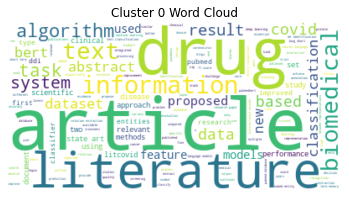

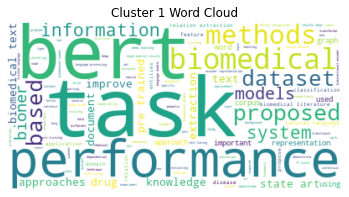

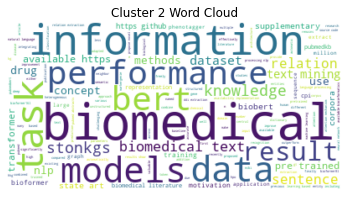

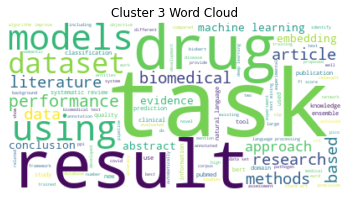

In [41]:
cluster_labels = kmeans.labels_

# Step 6: Generate a word cloud for each cluster
for i in range(num_clusters):
    cluster_abstracts = df.loc[cluster_labels == i, 'Preprocessed_Abstract']
    cluster_text = ' '.join(cluster_abstracts)
    
    # Generate the word cloud
    wordcloud = WordCloud(background_color='white').generate(cluster_text)
    
    # Plot the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {i} Word Cloud')
    plt.show()

In [42]:
pca = PCA(n_components=2, random_state=42)
embeddings_2d_pca = pca.fit_transform(embeddings_2d)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


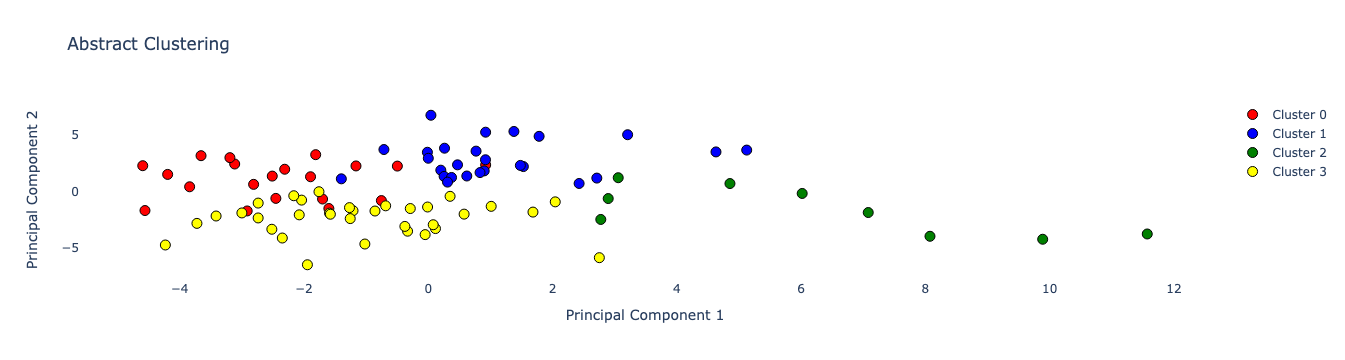

In [48]:
import plotly.graph_objects as go # Import the graphical object
import plotly.colors as colors


# Define custom colors for each cluster label
cluster_colors = ['red', 'blue', 'green', 'yellow', 'orange']

fig = go.Figure()

# Reset the figure
fig.data = []

# Add scatter plots for each cluster
for label in set(cluster_labels):
    cluster_df = df[df['Cluster'] == label]
    fig.add_trace(go.Scatter(
        x=embeddings_2d_pca[cluster_df.index, 0],
        y=embeddings_2d_pca[cluster_df.index, 1],
        mode='markers',
        marker=dict(
            color=cluster_colors[label],
            size=10,  # Adjust the marker size here
            line=dict(width=1, color='Black')
        ),
        hovertemplate='<b>Title:</b> %{text}',
        text=cluster_df['title'],
        name=f'Cluster {label}'
    ))


# Set plot title and axis labels
fig.update_layout(
    title='Abstract Clustering',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    plot_bgcolor='white'  # Set the background color to white
)


# With this save the plots 
plot(fig,
     image_filename='abstracts_cluster_bert_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=600
)
# And shows the plot
fig.show()

In [370]:
len(embeddings_2d[0])

768

# Summer School
vis https://www.sciencedirect.com/science/article/pii/S0950584921000690

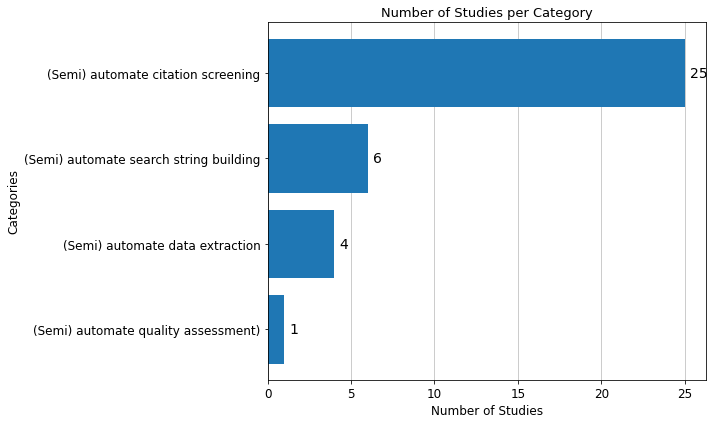

In [584]:
import matplotlib.pyplot as plt

categories = ['(Semi) automate citation screening', '(Semi) automate search string building', '(Semi) automate data extraction', '(Semi) automate quality assessment)']
nr_studies = [25, 6, 4, 1]

sorted_indices = sorted(range(len(nr_studies)), key=lambda k: nr_studies[k])
sorted_categories = [categories[i] for i in sorted_indices]
sorted_nr_studies = [nr_studies[i] for i in sorted_indices]

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars and set their zorder to be higher than the grid lines
bars = ax.barh(sorted_categories, sorted_nr_studies, zorder=1)

# Add labels on the bars
for bar in bars:
    value = bar.get_width()
    ax.text(value + 0.3, bar.get_y() + bar.get_height()/2, str(value), va='center', color='black', fontsize=14)

ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', alpha=0.5)

plt.ylabel('Categories', fontsize=12)  # Increase font size for ylabel
plt.xlabel('Number of Studies', fontsize=12)  # Increase font size for xlabel
plt.title('Number of Studies per Category', fontsize=13)  # Increase font size for title

# Increase font size of tick labels on both axes
ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()

# Save the figure
plt.savefig('bar_chart.png', dpi=300)  # Change the filename and dpi as needed

plt.show()


In [581]:
!ls

Literature Review.ipynb
README.md
bar_chart_sr_automation_summer_school.png
data
temp-plot.html
viz
